In [111]:
import pandas as pd
from prophet import Prophet

In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
# Read the CSV files
df = pd.read_csv('sales_asp_footwear.csv')
df1 = pd.read_csv('itemmaster_footwear.csv')
df2 = pd.read_csv('location master.csv')


In [114]:
df3 = pd.read_csv('TimeDimension  edited.csv')

In [115]:
df = df.merge(df1, how='left', on='Item.[Planning Item]')
df = df.merge(df2, how='left', on='Location.[Location]')
df = df.merge(df3[['Time.[WeekKey]', 'Time.[Week]']].drop_duplicates(), how='left', on='Time.[Week]')
df.head()

,Format.[Format],Version.[Version Name],Time.[Week],Sales Domain.[Channel],Location.[Location],Item.[Planning Item],Item.[Division]_x,Total Sales Units,ASP,Item.[Division]_y,...,Item.[Season],Item.[Silhouette],Item.[Sub Silhouette1],Item.[Sub Silhouette2],Location.[Location City],Location.[Location Country],Location.[Shoppers Yield ATV],Location.[StoreConcept],Location.[StoreFormat],Time.[WeekKey]
0,FOL,CurrentWorkingView,Jan WK01 2021,CLEARANCE,1028,ADEF0309|OWNTHEGAME K,FOOTWEAR,1,227.62,FOOTWEAR,...,FALL,SHOES,LACED SHOES,MID TOP,DUBAI,UTD.ARAB EMIR.,84.510895,FOL,FOL,01-03-2021 00:00
1,FOL,CurrentWorkingView,Jan WK01 2021,CLEARANCE,1041,ADEF0309|OWNTHEGAME K,FOOTWEAR,1,227.62,FOOTWEAR,...,FALL,SHOES,LACED SHOES,MID TOP,DUBAI,UTD.ARAB EMIR.,38.290634,FOL,FOL,01-03-2021 00:00
2,FOL,CurrentWorkingView,Jan WK01 2021,CLEARANCE,1403,ADEF0309|OWNTHEGAME K,FOOTWEAR,1,227.62,FOOTWEAR,...,FALL,SHOES,LACED SHOES,MID TOP,RAS AL KHAIMAH,UTD.ARAB EMIR.,108.96125,FOL,FOL,01-03-2021 00:00
3,FOL,CurrentWorkingView,Jan WK01 2021,CLEARANCE,1004,ADFW4566|OWNTHEGAME K,FOOTWEAR,1,227.62,FOOTWEAR,...,FALL,SHOES,LACED SHOES,MID TOP,DUBAI,UTD.ARAB EMIR.,56.86772,FOL,FOL,01-03-2021 00:00
4,FOL,CurrentWorkingView,Jan WK01 2021,CLEARANCE,1071,ADFW4566|OWNTHEGAME K,FOOTWEAR,1,227.62,FOOTWEAR,...,FALL,SHOES,LACED SHOES,MID TOP,DUBAI,UTD.ARAB EMIR.,47.497326,FOL,FOL,01-03-2021 00:00


In [116]:
# Select columns
selected_columns = ['Time.[WeekKey]', 'Total Sales Units','Location.[Location Country]']
separated_data = df[selected_columns].rename(columns={'Time.[WeekKey]': 'ds', 'Total Sales Units': 'y'})
separated_data.head()
separated_data= separated_data.groupby(['Location.[Location Country]','ds'])['y'].sum().reset_index()

In [117]:
separated_data.head()

,Location.[Location Country],ds,y
0,BAHRAIN,01-01-2023 00:00,2032
1,BAHRAIN,01-02-2022 00:00,1402
2,BAHRAIN,01-03-2021 00:00,1775
3,BAHRAIN,01-08-2023 00:00,1046
4,BAHRAIN,01-09-2022 00:00,1246


In [118]:
separated_data=separated_data[separated_data['Location.[Location Country]']=='UTD.ARAB EMIR.']
separated_data.shape

(113, 3)

In [119]:
m = Prophet()
m.fit(separated_data)

18:46:56 - cmdstanpy - INFO - Chain [1] start processing
18:46:56 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
160,2023-04-15
161,2023-04-16
162,2023-04-17
163,2023-04-18
164,2023-04-19


In [121]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
160,2023-04-15,25861.097985,17953.908115,33566.628215
161,2023-04-16,26129.873989,18258.230627,33441.698034
162,2023-04-17,26516.904676,18543.951103,34188.690134
163,2023-04-18,27014.771190,18810.532306,34682.781034
164,2023-04-19,27613.958621,20312.626941,35382.187534


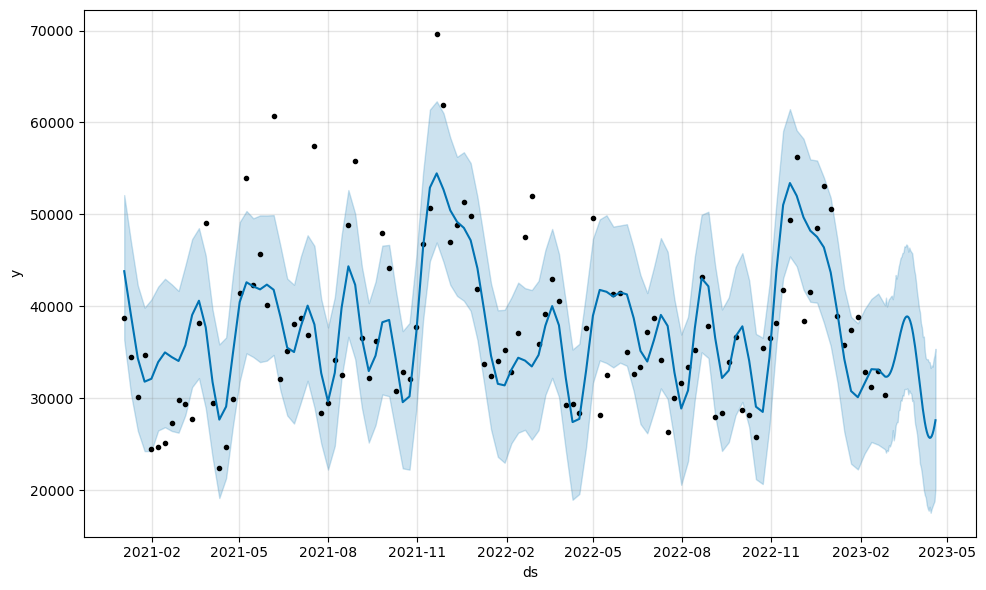

In [122]:
fig1 = m.plot(forecast)


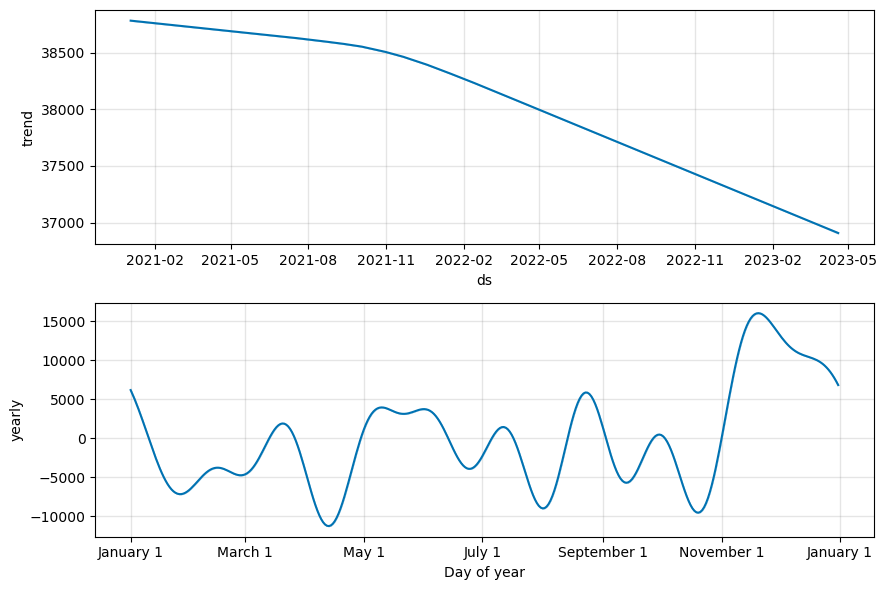

In [123]:
fig2 = m.plot_components(forecast)

In [133]:
# Select columns
selected_columns = ['Time.[WeekKey]', 'Total Sales Units','Location.[Location Country]']
separated_data = df[selected_columns].rename(columns={'Time.[WeekKey]': 'ds', 'Total Sales Units': 'y'})
separated_data.head()
separated_data= separated_data.groupby(['Location.[Location Country]','ds'])['y'].sum().reset_index()

In [134]:
separated_data=separated_data[separated_data['Location.[Location Country]']=='SAUDI ARABIA']

In [135]:
m = Prophet()
m.fit(separated_data)

18:48:04 - cmdstanpy - INFO - Chain [1] start processing
18:48:04 - cmdstanpy - INFO - Chain [1] done processing


In [136]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
160,2023-04-15
161,2023-04-16
162,2023-04-17
163,2023-04-18
164,2023-04-19


In [137]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
160,2023-04-15,13939.800241,9024.362908,19250.248007
161,2023-04-16,14237.909497,8907.640855,19035.479664
162,2023-04-17,14573.248703,9639.779389,19676.403999
163,2023-04-18,14937.707012,10045.406893,20097.940865
164,2023-04-19,15322.329116,9978.385427,20273.165038


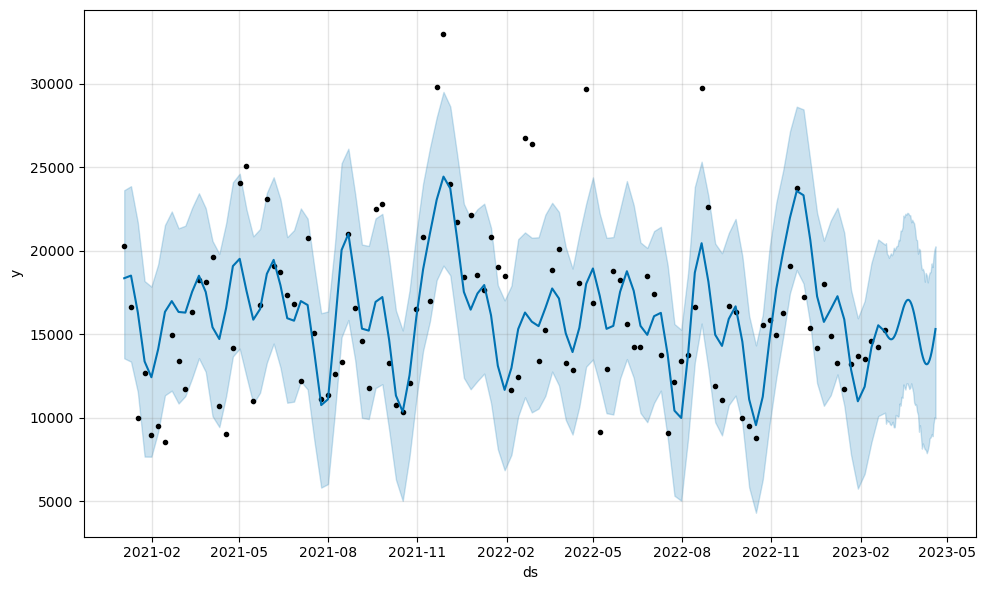

In [138]:
fig3 = m.plot(forecast)

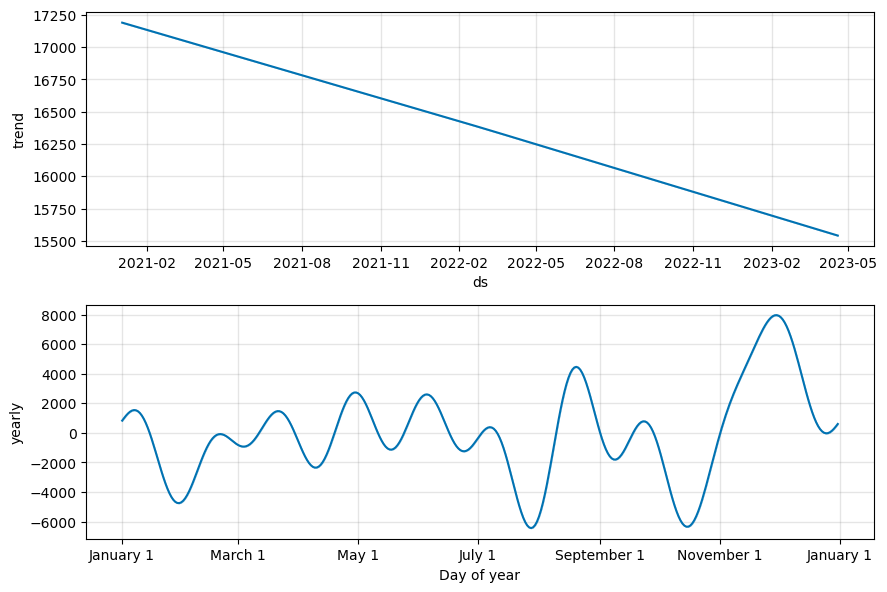

In [139]:
fig4 = m.plot_components(forecast)

In [142]:
# Select columns
selected_columns = ['Time.[WeekKey]', 'Total Sales Units','Location.[Location Country]']
separated_data = df[selected_columns].rename(columns={'Time.[WeekKey]': 'ds', 'Total Sales Units': 'y'})
separated_data.head()
separated_data= separated_data.groupby(['Location.[Location Country]','ds'])['y'].sum().reset_index()

In [143]:
separated_data=separated_data[separated_data['Location.[Location Country]']=='QATAR']

In [144]:
m = Prophet()
m.fit(separated_data)

18:49:14 - cmdstanpy - INFO - Chain [1] start processing
18:49:14 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
160,2023-04-15
161,2023-04-16
162,2023-04-17
163,2023-04-18
164,2023-04-19


In [146]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
160,2023-04-15,1857.848753,937.427426,2746.079619
161,2023-04-16,1954.722070,1037.825414,2819.640484
162,2023-04-17,2066.749468,1185.486071,2951.263022
163,2023-04-18,2192.362709,1361.517361,3091.546362
164,2023-04-19,2329.738833,1401.380985,3231.441827


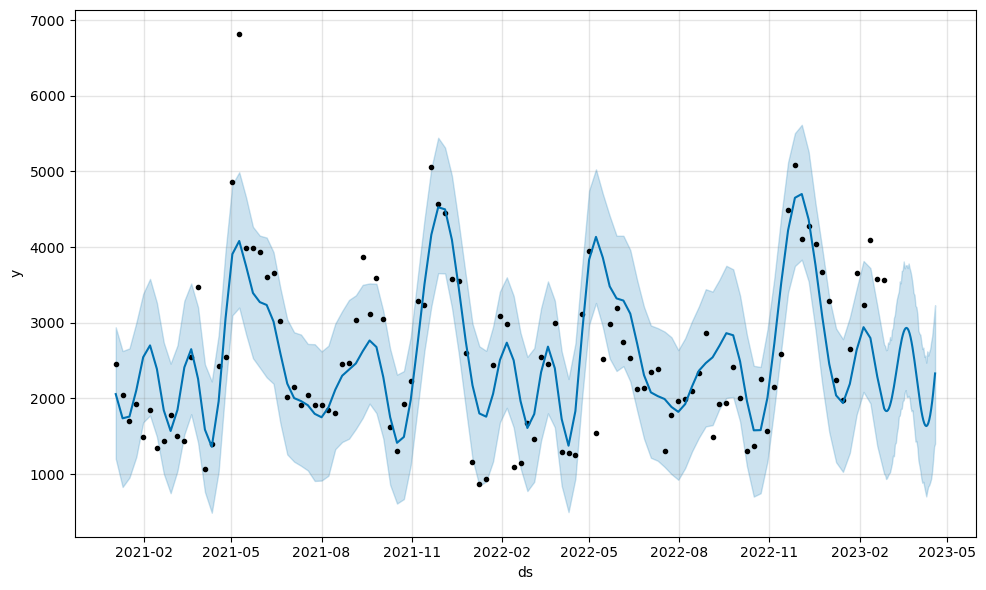

In [147]:
fig5= m.plot(forecast)

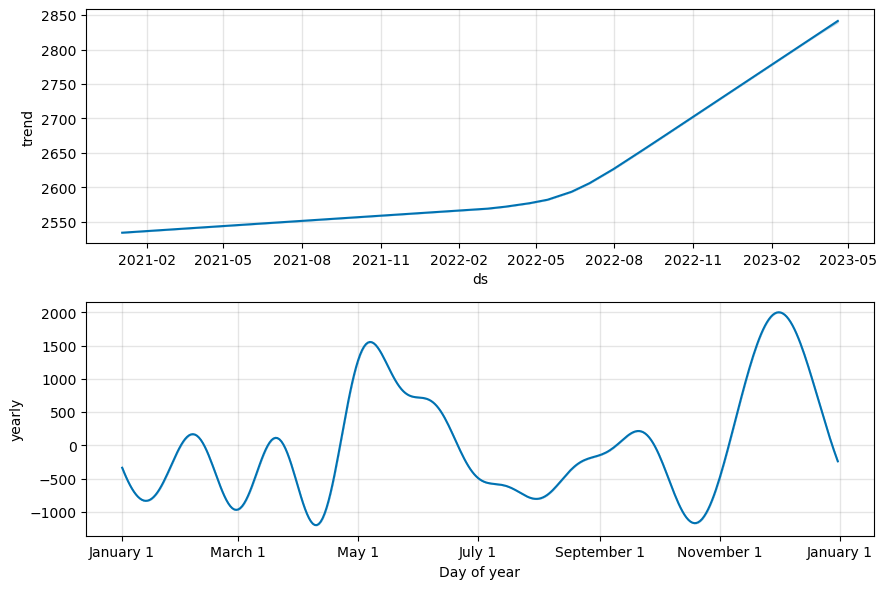

In [148]:
fig6 = m.plot_components(forecast)

In [149]:
# Select columns
selected_columns = ['Time.[WeekKey]', 'Total Sales Units','Location.[Location Country]']
separated_data = df[selected_columns].rename(columns={'Time.[WeekKey]': 'ds', 'Total Sales Units': 'y'})
separated_data.head()
separated_data= separated_data.groupby(['Location.[Location Country]','ds'])['y'].sum().reset_index()

In [150]:
separated_data=separated_data[separated_data['Location.[Location Country]']=='OMAN']

In [151]:
m = Prophet()
m.fit(separated_data)

18:51:38 - cmdstanpy - INFO - Chain [1] start processing
18:51:38 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
160,2023-04-15
161,2023-04-16
162,2023-04-17
163,2023-04-18
164,2023-04-19


In [153]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
160,2023-04-15,783.291790,462.665525,1142.964709
161,2023-04-16,779.608583,445.515663,1136.364393
162,2023-04-17,778.050941,437.637318,1149.875303
163,2023-04-18,778.249778,420.364461,1107.465594
164,2023-04-19,779.839388,470.602893,1126.835410


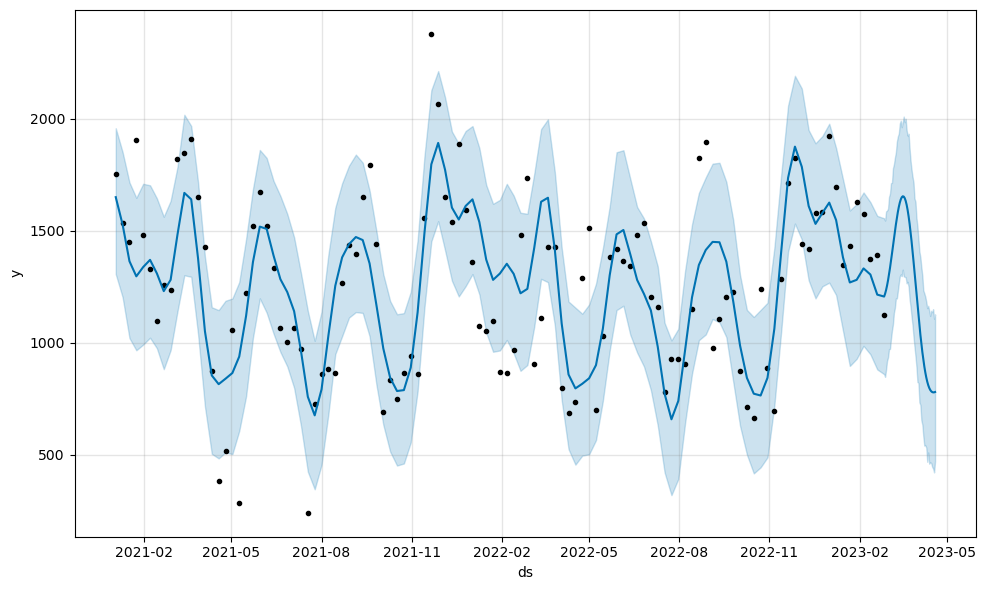

In [154]:
fig7= m.plot(forecast)

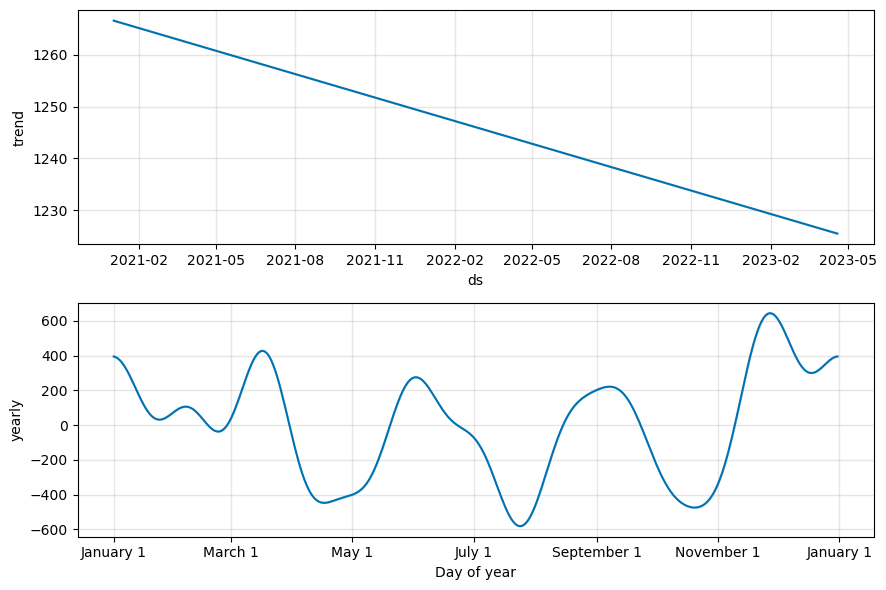

In [155]:
fig8 = m.plot_components(forecast)

In [156]:
# Select columns
selected_columns = ['Time.[WeekKey]', 'Total Sales Units','Location.[Location Country]']
separated_data = df[selected_columns].rename(columns={'Time.[WeekKey]': 'ds', 'Total Sales Units': 'y'})
separated_data.head()
separated_data= separated_data.groupby(['Location.[Location Country]','ds'])['y'].sum().reset_index()

In [157]:
separated_data=separated_data[separated_data['Location.[Location Country]']=='KUWAIT']

In [158]:
m = Prophet()
m.fit(separated_data)

18:54:04 - cmdstanpy - INFO - Chain [1] start processing
18:54:04 - cmdstanpy - INFO - Chain [1] done processing


In [159]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
160,2023-04-15
161,2023-04-16
162,2023-04-17
163,2023-04-18
164,2023-04-19


In [160]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
160,2023-04-15,2831.041915,1399.032314,4176.704373
161,2023-04-16,2870.090206,1486.169442,4334.834625
162,2023-04-17,2922.977454,1536.033256,4353.271685
163,2023-04-18,2988.551854,1452.800592,4325.713375
164,2023-04-19,3065.476576,1695.352570,4576.713988


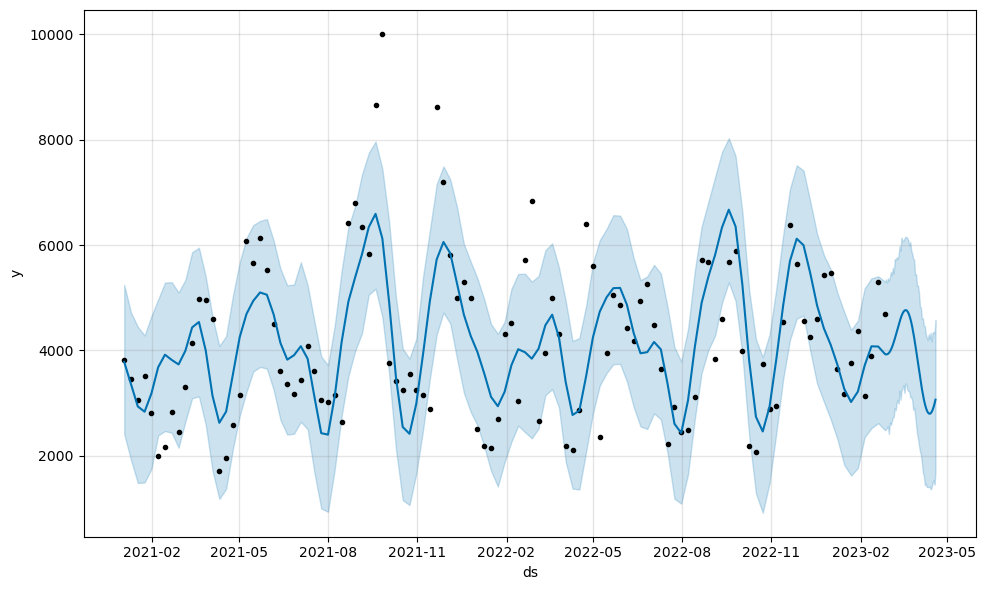

In [161]:
fig9= m.plot(forecast)

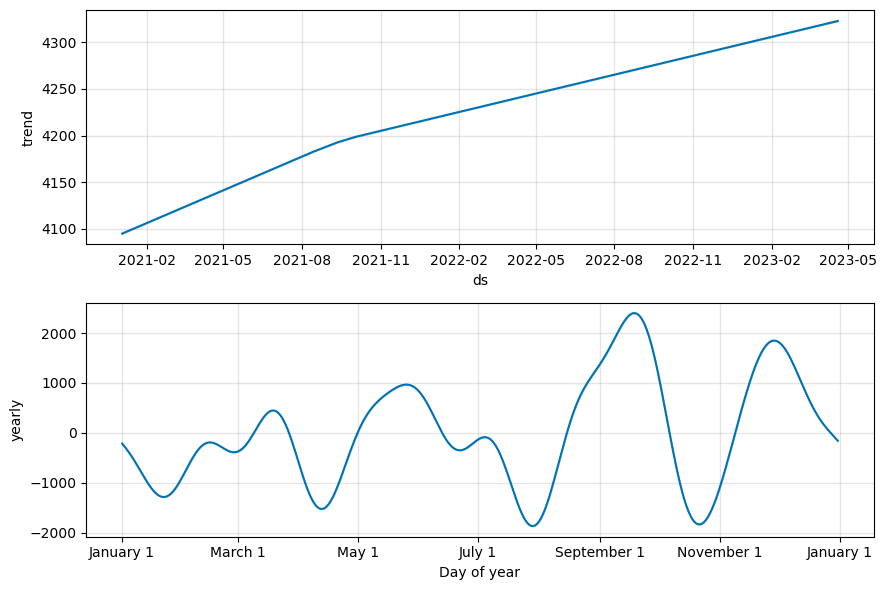

In [162]:
fig10 = m.plot_components(forecast)

In [163]:
# Select columns
selected_columns = ['Time.[WeekKey]', 'Total Sales Units','Location.[Location Country]']
separated_data = df[selected_columns].rename(columns={'Time.[WeekKey]': 'ds', 'Total Sales Units': 'y'})
separated_data.head()
separated_data= separated_data.groupby(['Location.[Location Country]','ds'])['y'].sum().reset_index()

In [164]:
separated_data=separated_data[separated_data['Location.[Location Country]']=='BAHRAIN']

In [165]:
m = Prophet()
m.fit(separated_data)

18:56:38 - cmdstanpy - INFO - Chain [1] start processing
18:56:38 - cmdstanpy - INFO - Chain [1] done processing


In [166]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
156,2023-04-15
157,2023-04-16
158,2023-04-17
159,2023-04-18
160,2023-04-19


In [167]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
156,2023-04-15,932.589914,234.844490,1570.221507
157,2023-04-16,966.117050,264.103350,1638.295885
158,2023-04-17,1007.268484,328.553728,1722.809035
159,2023-04-18,1055.059823,340.169440,1761.119272
160,2023-04-19,1108.364565,466.460417,1739.023150


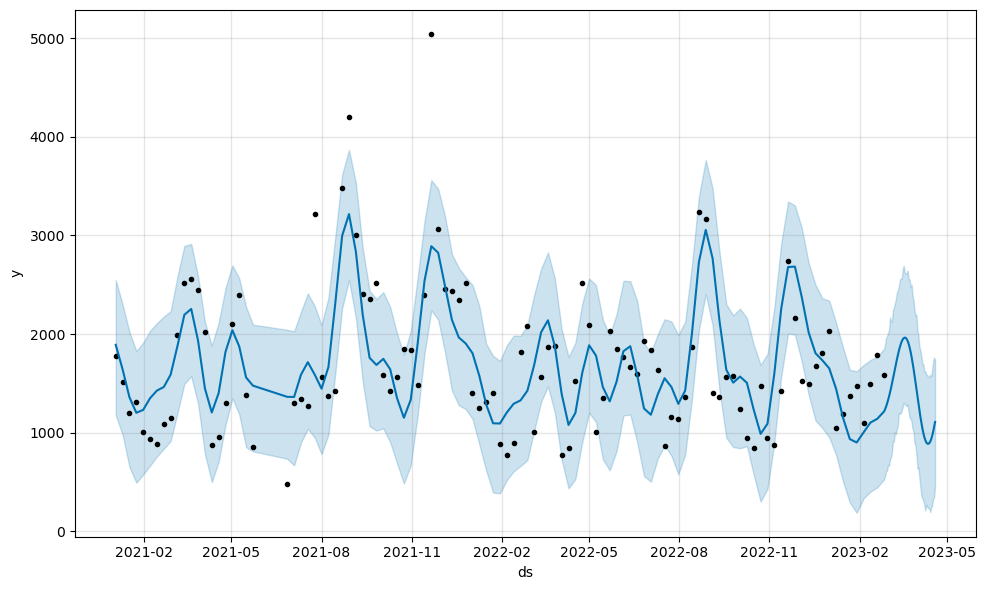

In [168]:
fig11= m.plot(forecast)

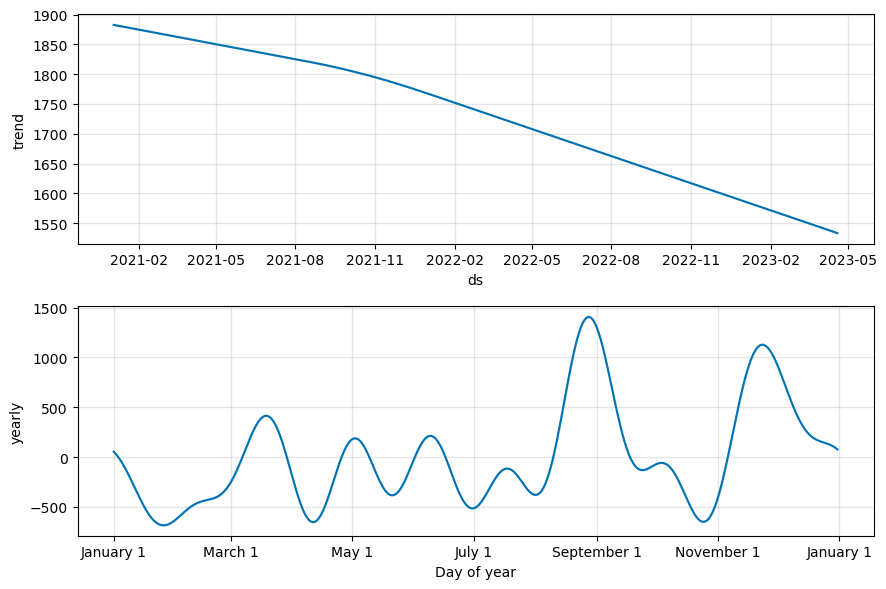

In [169]:
fig12 = m.plot_components(forecast)